In [71]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


In [72]:
df=pd.read_csv("Desktop/co2.csv")

In [73]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [75]:
df=df.drop(["Make","Model","Vehicle Class","Transmission","Fuel Type"],axis=1)   

In [76]:
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Fuel Consumption City (L/100 km)  7385 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 5   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 6   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 404.0 KB


In [80]:
df.isnull().sum()#eksik verilere bakıyoruz

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [81]:
df.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

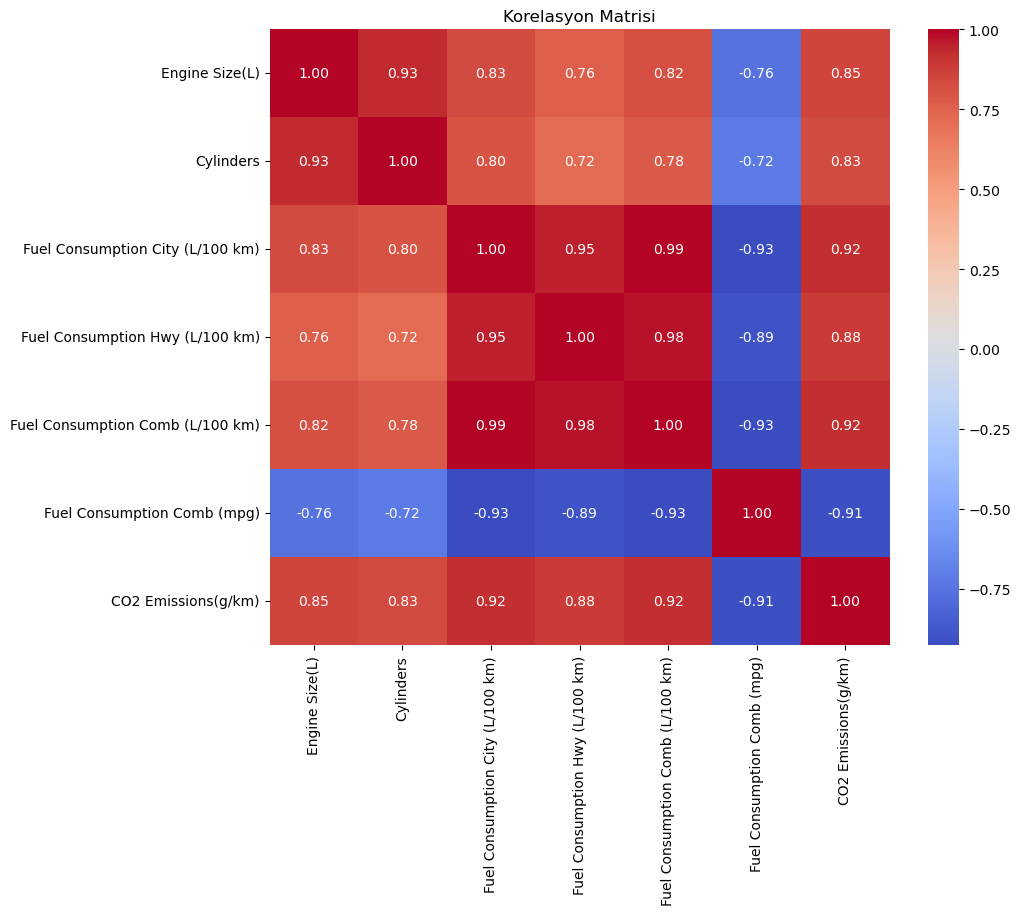

In [82]:
correlation_matrix = df.corr()

# Korelasyon matrisini çizdir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Korelasyon Matrisi')
plt.show()

In [50]:
x=df.drop("CO2 Emissions(g/km)",axis=1)
y=df["CO2 Emissions(g/km)"]

In [51]:
x

,Engine Size(L),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,6.7,8.5,33
1,2.4,7.7,9.6,29
2,1.5,5.8,5.9,48
3,3.5,9.1,11.1,25
4,3.5,8.7,10.6,27
...,...,...,...,...
7380,2.0,7.7,9.4,30
7381,2.0,8.3,9.9,29
7382,2.0,8.6,10.3,27
7383,2.0,8.3,9.9,29


In [52]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

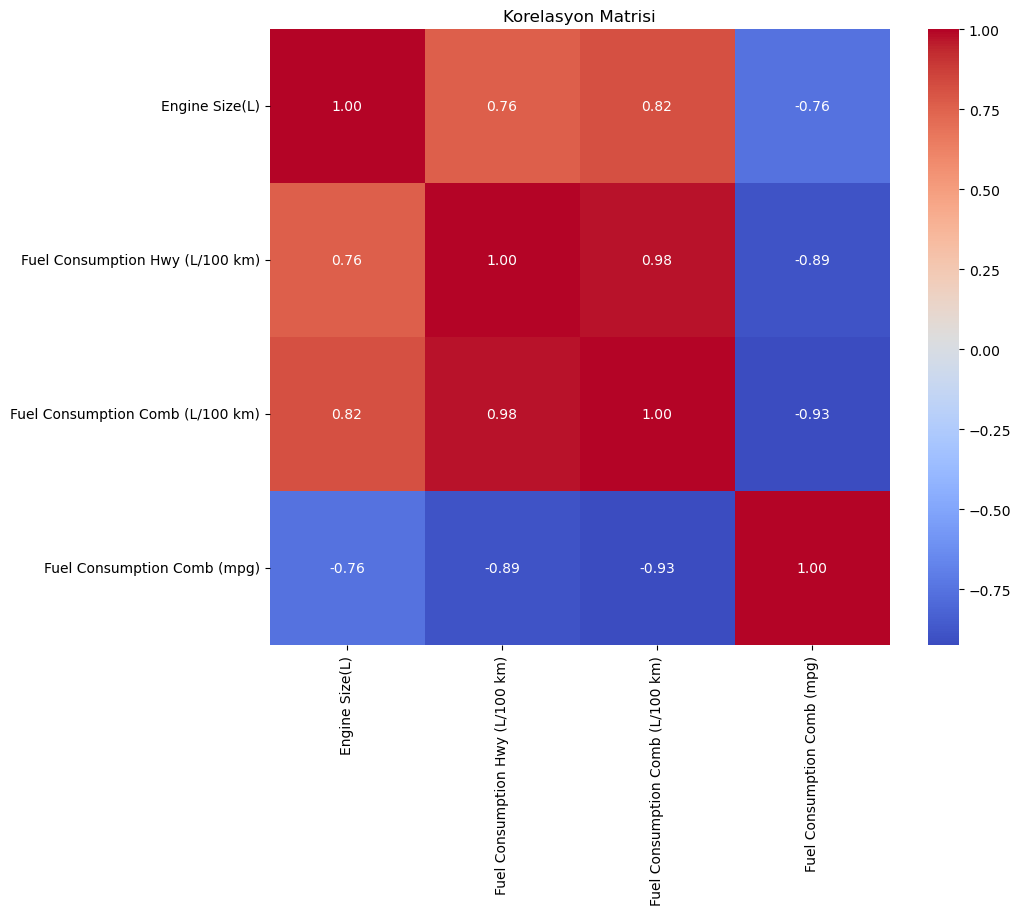

In [53]:
correlation_matrix = x.corr()

# Korelasyon matrisini çizdir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Korelasyon Matrisi')
plt.show()

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

0.8950909789315287

In [61]:
df=df.drop(["Cylinders","Fuel Consumption City (L/100 km)"],axis=1)

KeyError: "['Cylinders', 'Fuel Consumption City (L/100 km)'] not found in axis"

In [57]:
x=df.drop("CO2 Emissions(g/km)",axis=1)
y=df["CO2 Emissions(g/km)"]

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [59]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

0.8950909789315287

In [45]:
x

,Engine Size(L),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,6.7,8.5,33
1,2.4,7.7,9.6,29
2,1.5,5.8,5.9,48
3,3.5,9.1,11.1,25
4,3.5,8.7,10.6,27
...,...,...,...,...
7380,2.0,7.7,9.4,30
7381,2.0,8.3,9.9,29
7382,2.0,8.6,10.3,27
7383,2.0,8.3,9.9,29
